In [2]:
from data_download_tool import download_data, summarize_s3_structure
from annotation_viewer import plot_annotations, plot_annotation_subset
from pandas_statistics import file_path_loader
from plots import *
import os


## Download tool
This is the tool you use to download data from the AWS silt annotations bucket. Enter in the aws directory, and where you would like to download your data to. 

In [13]:
#Enter in the parameters you wish to download
aws_directory = "third-party-data/PDS-LMNT01/Satellite/Annotations/PDS-LMNT01/2024-07-20/"
download_directory = "/mnt/c/Users/david.chaparro/Documents/Repos/Dataset-Statistics/data/LMNT01Satellite-2024-07-20"
statistics_filename = "LMNT01Satellite-2024-07-20"

download_data(aws_directory, download_directory, statistics_filename)

Loading file locations: 10it [00:03,  2.90it/s]


## Select Dataset
Before using any of the functions below this, please enter in the directory of the dataset you want to analyze. From here all other functions work. 

In [3]:
#Enter in the parameters you wish to download
# /mnt/c/Users/david.chaparro/Documents/Repos/Dataset-Statistics/data/RME03Star
# /mnt/c/Users/david.chaparro/Documents/Repos/Dataset-Statistics/data/RME01Star
dataset_directory = "/mnt/c/Users/david.chaparro/Documents/Repos/Dataset-Statistics/data/PDS-RME04-2024-07-31"

#Local file handling tool
local_files = file_path_loader(dataset_directory)
print(f"Num Samples: {len(local_files)}")


Num Samples: 839


## Plot Dataset Statistics

This generates plots for all attributes collected during download or during statistics recalculation. 

file
categorical


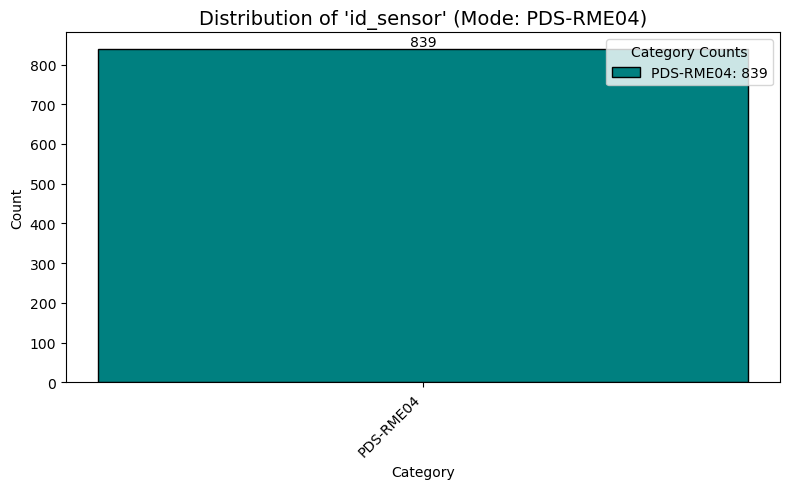

categorical


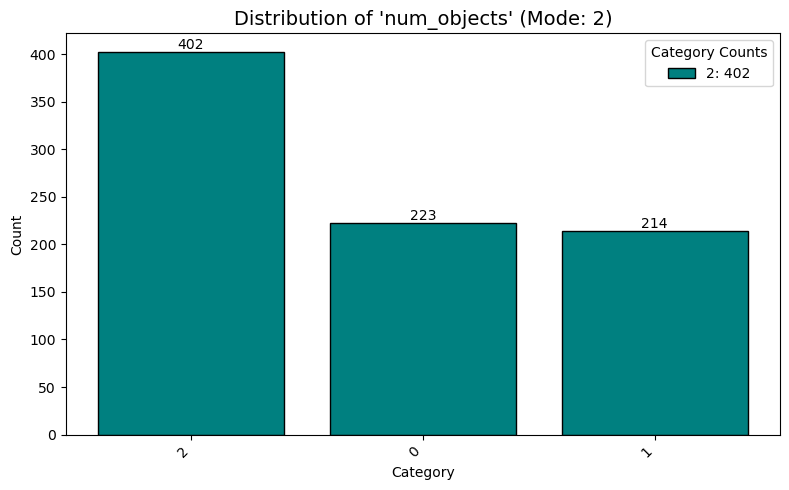

categorical


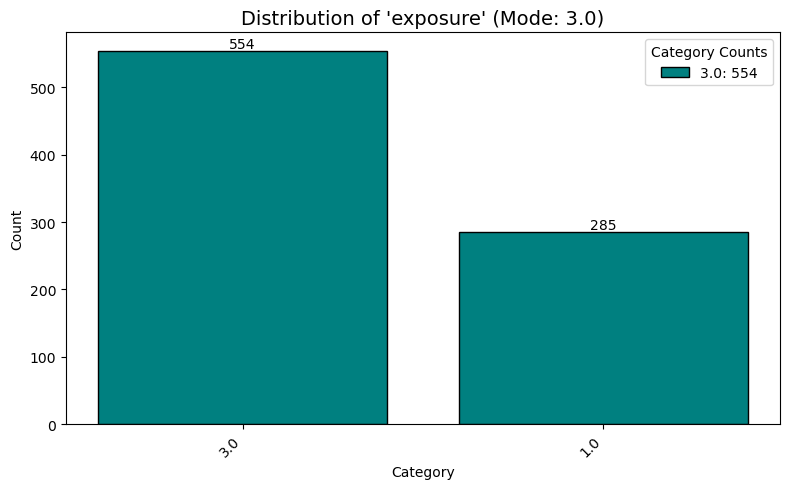

numerical


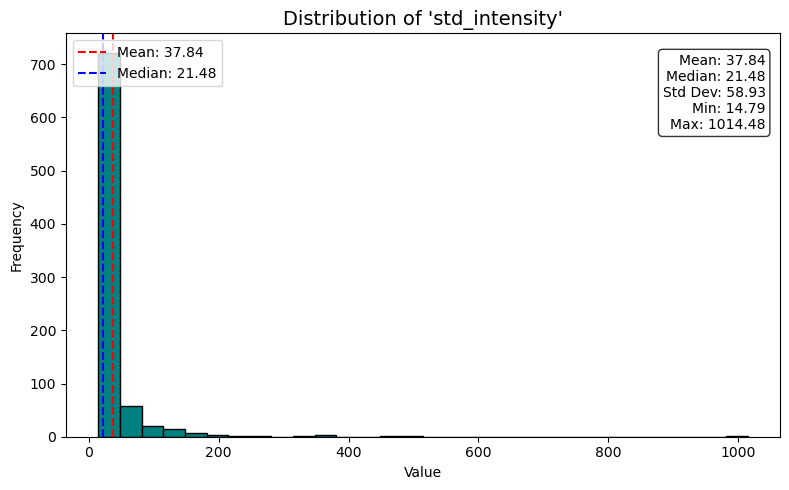

numerical


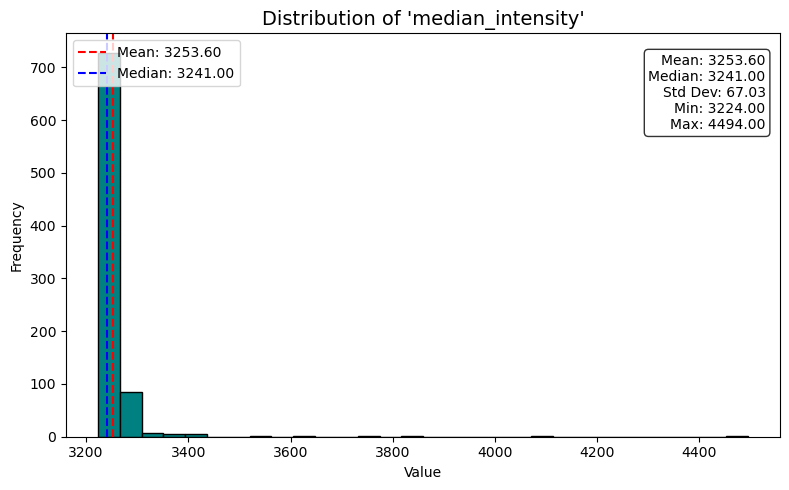

categorical


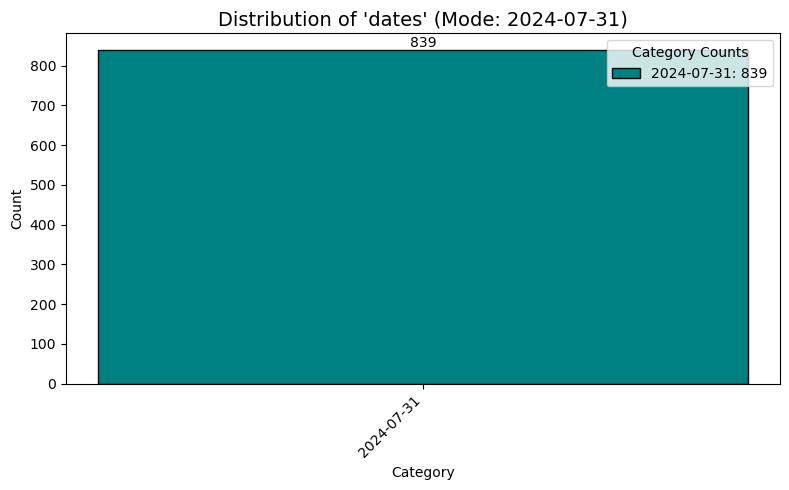

time


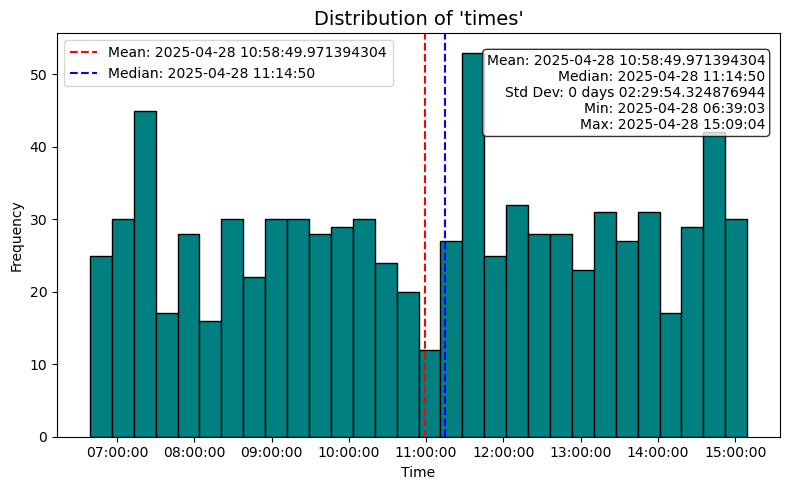

categorical


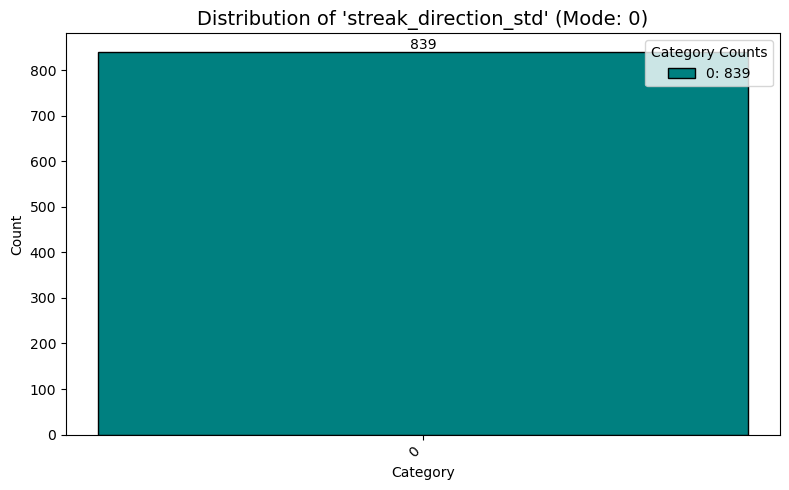

categorical


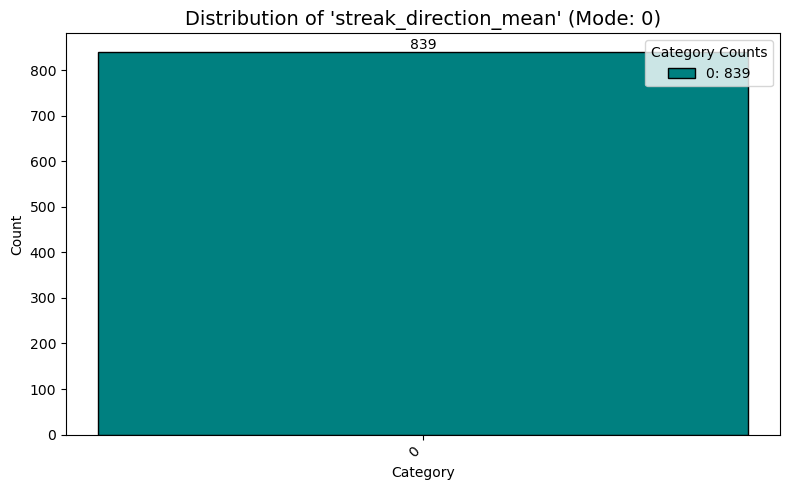

categorical


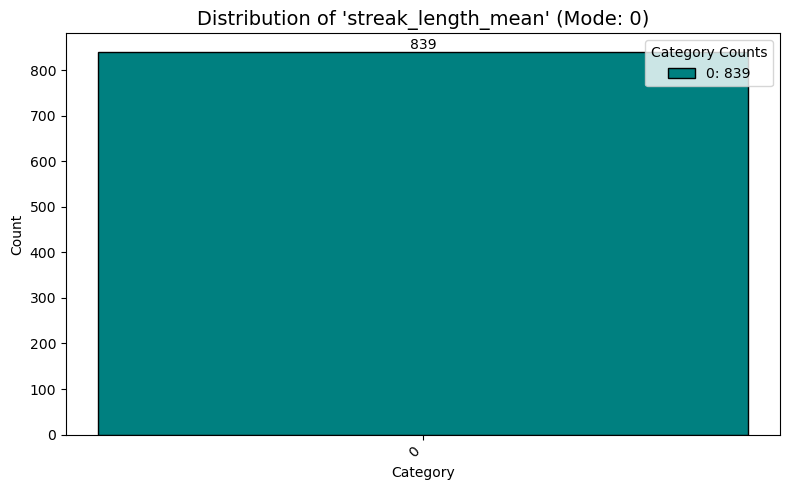

categorical


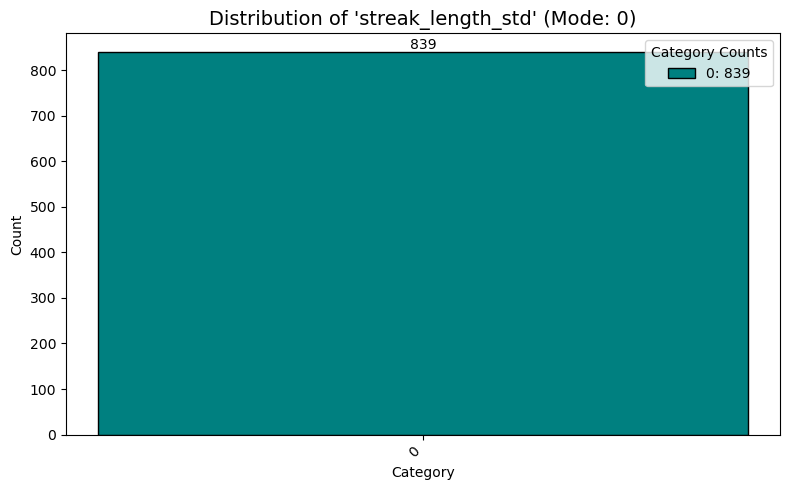

categorical


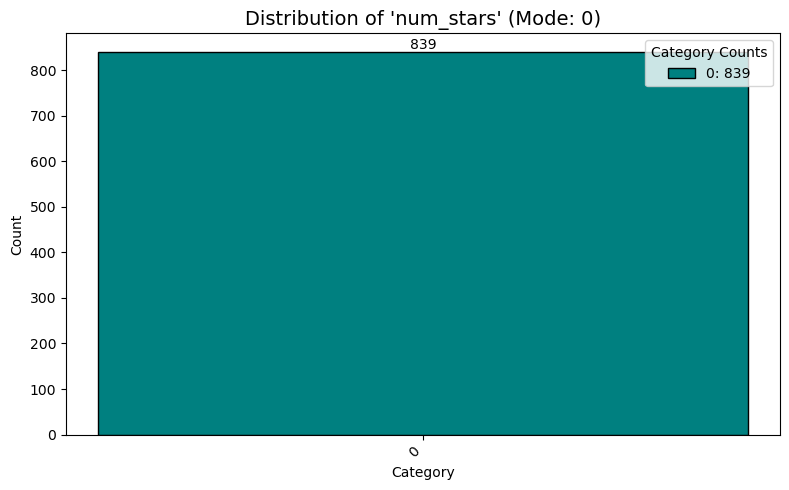

categorical


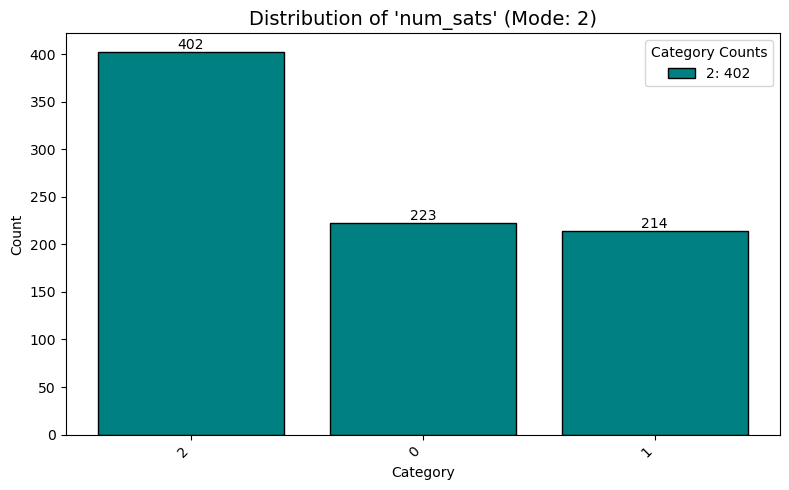

categorical


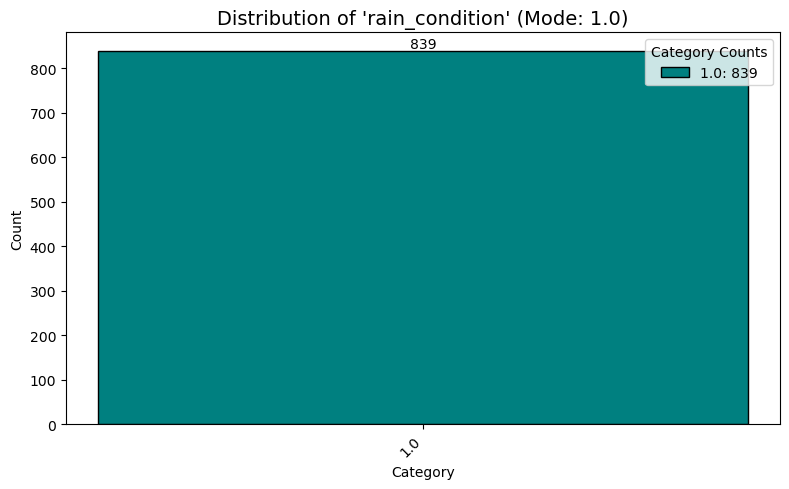

categorical


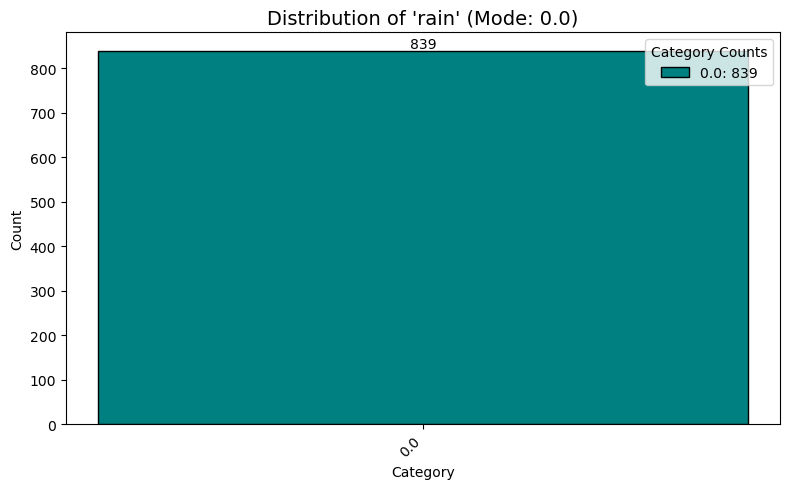

categorical


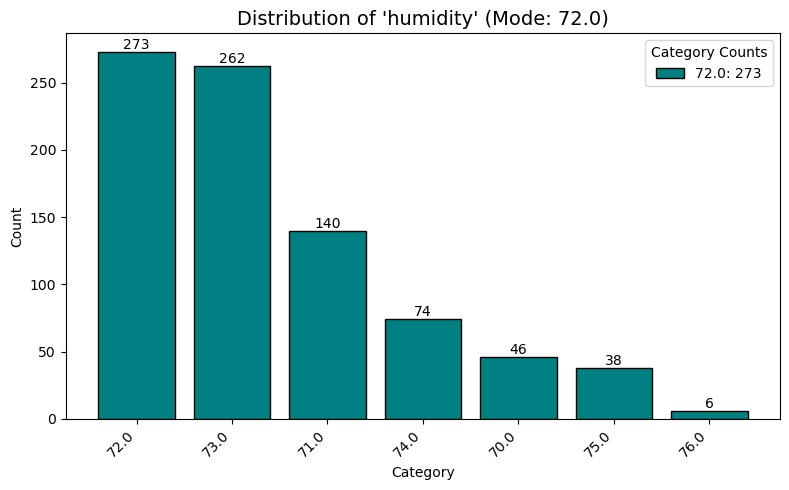

numerical


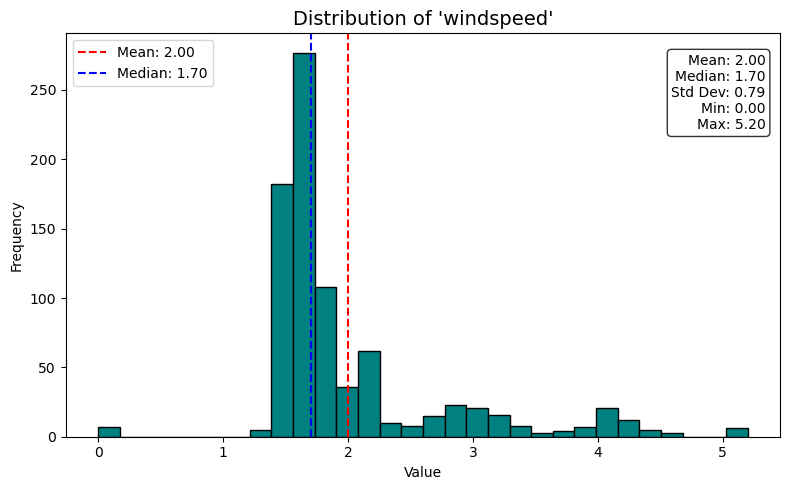

file
file


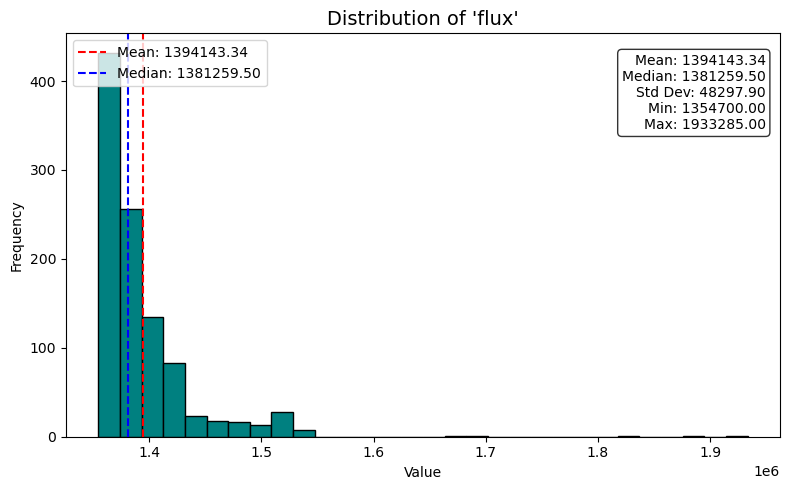

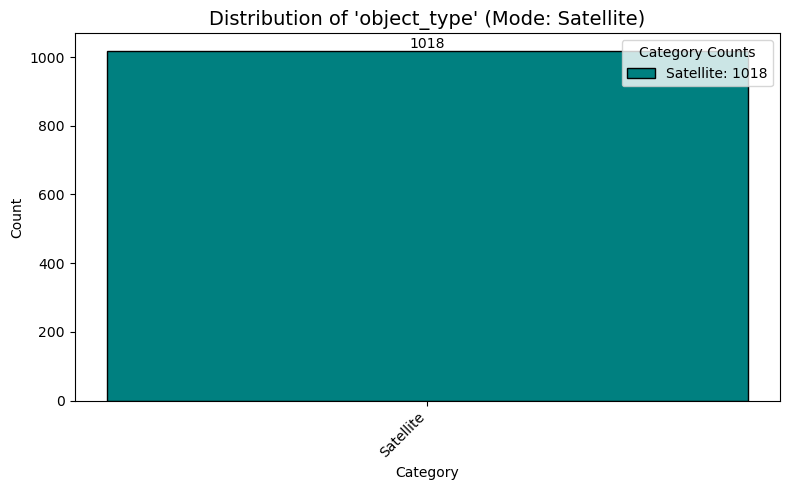

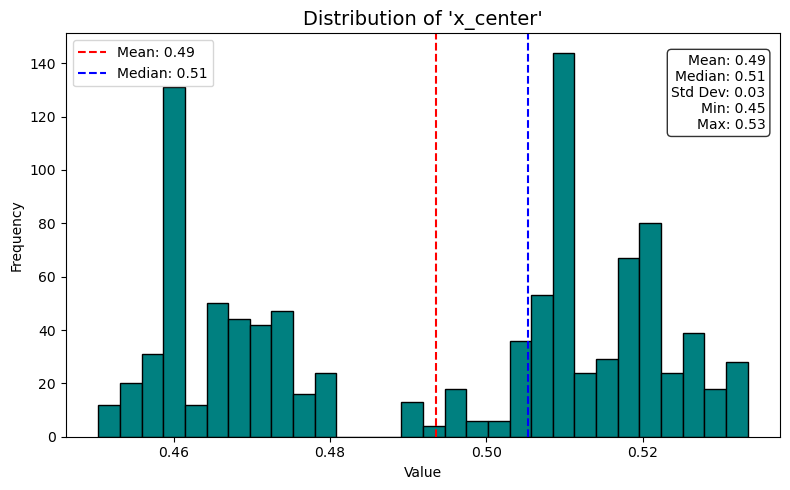

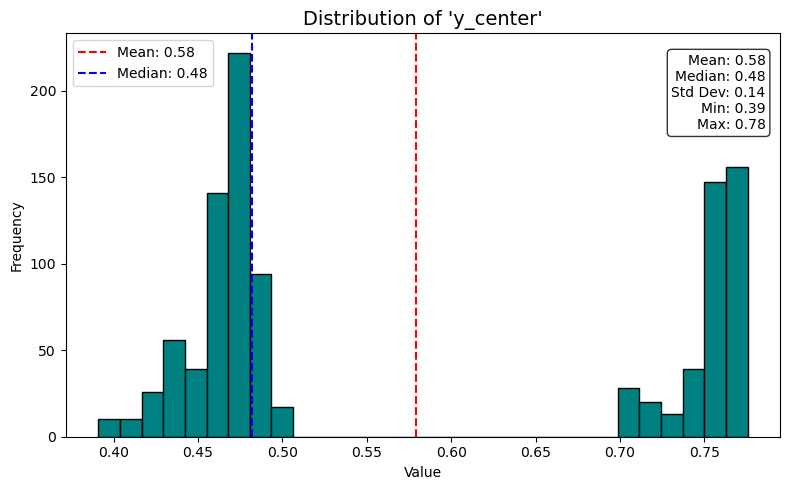

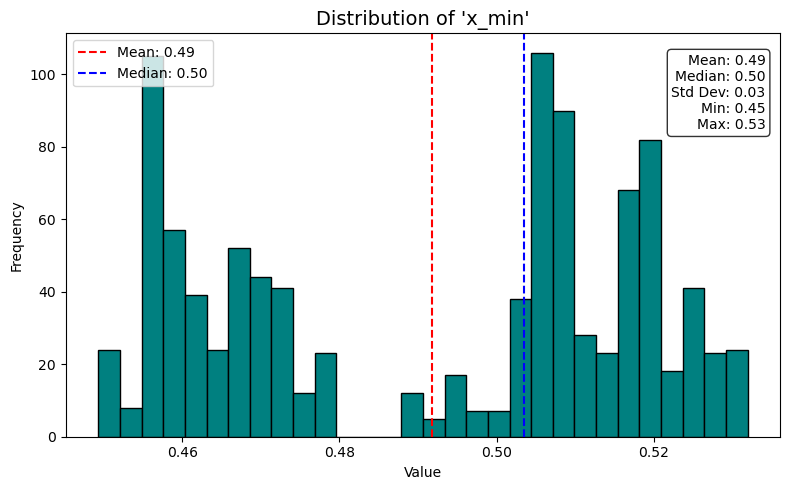

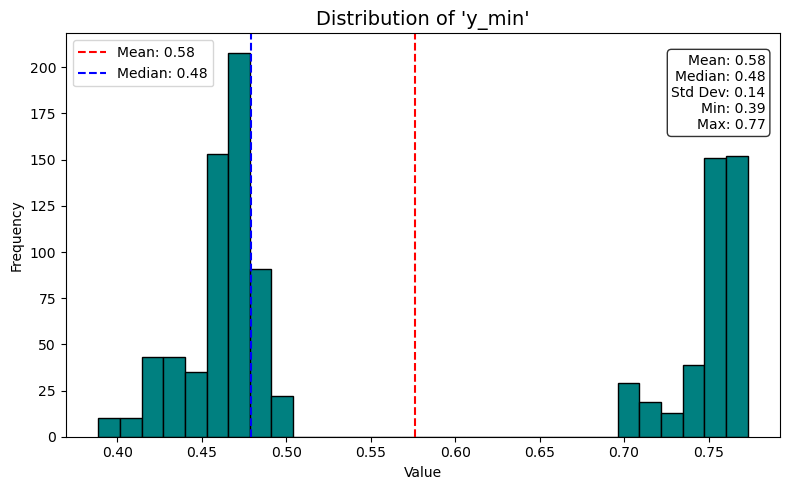

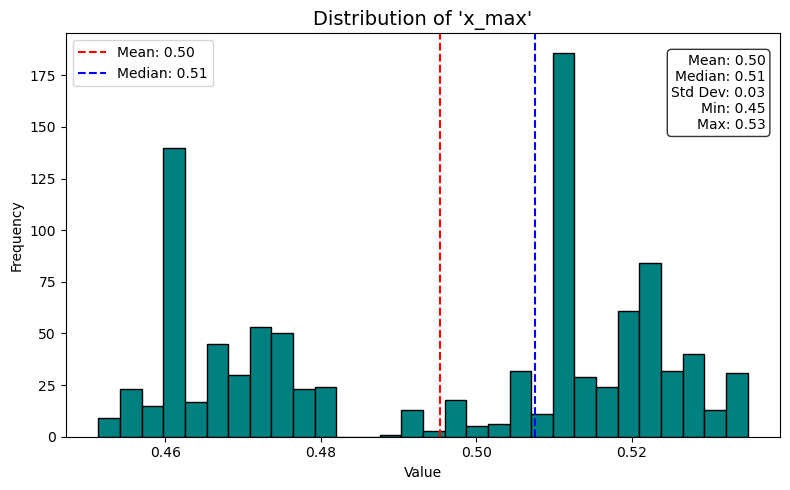

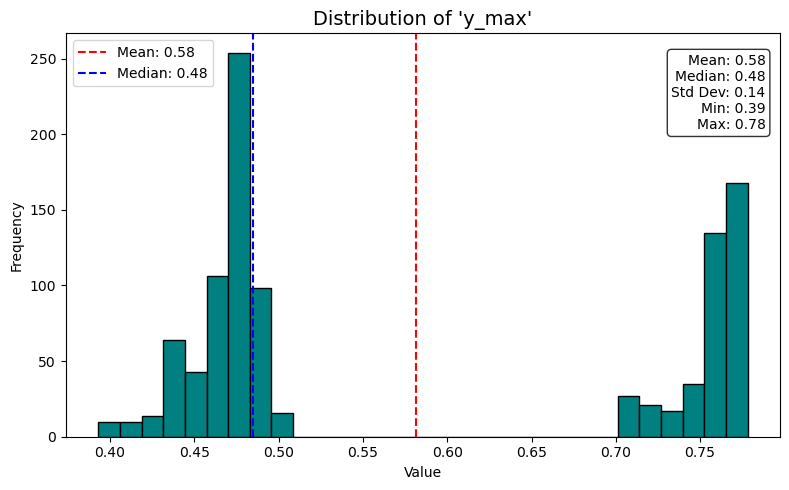

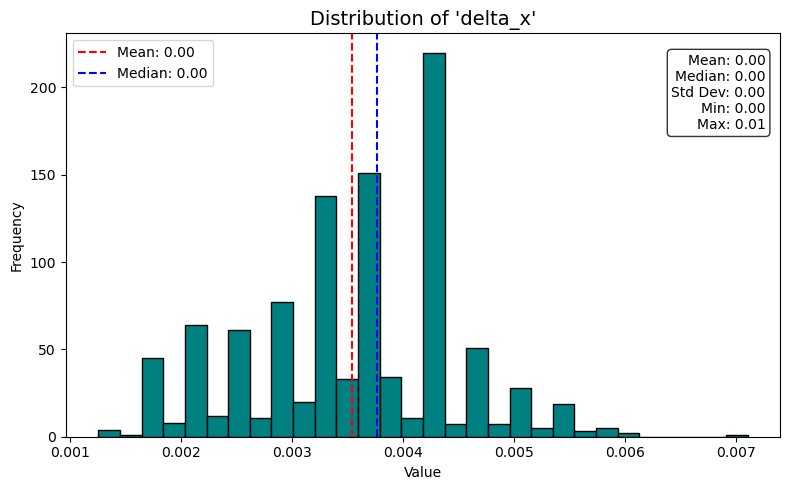

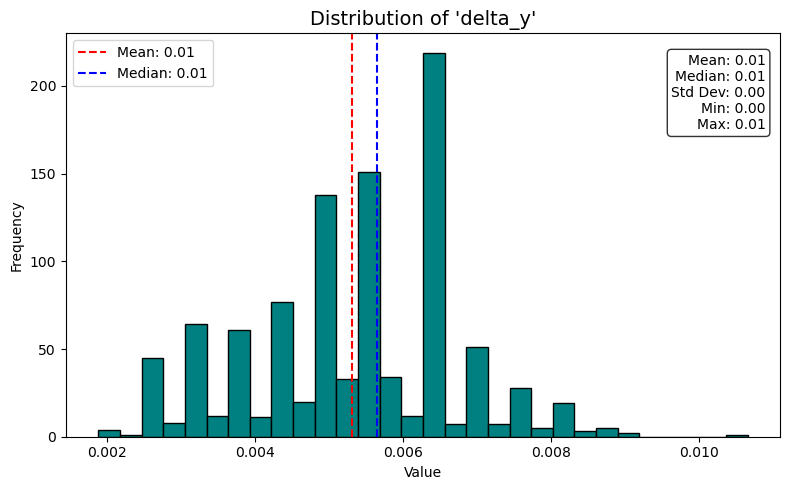

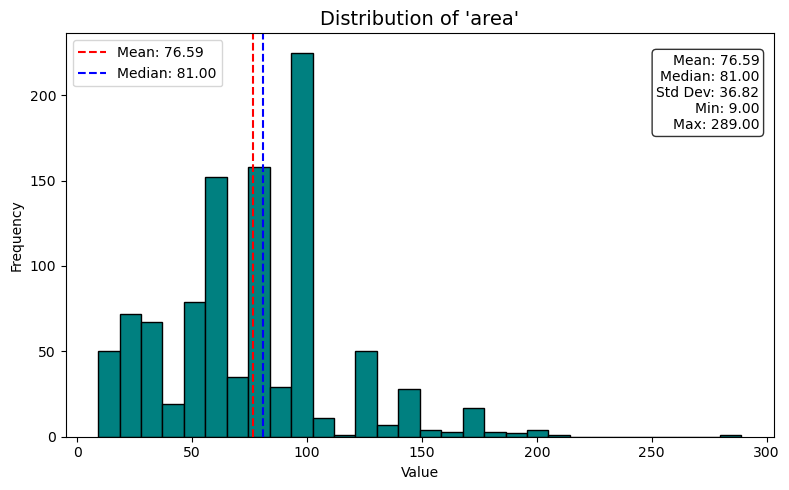

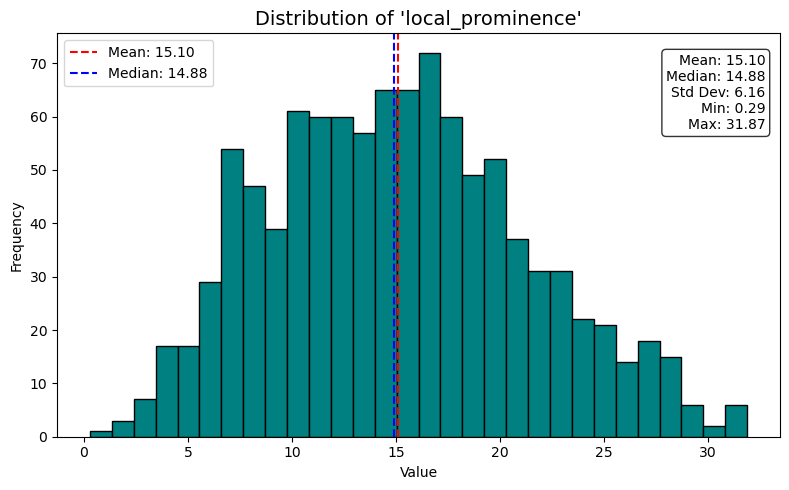

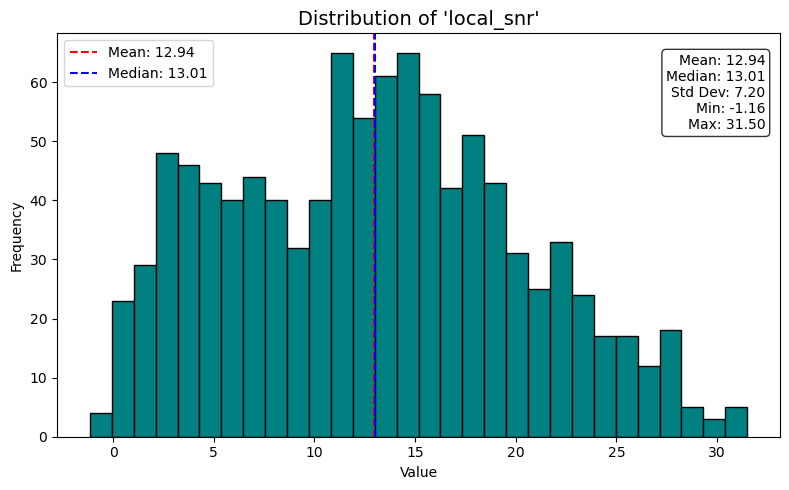

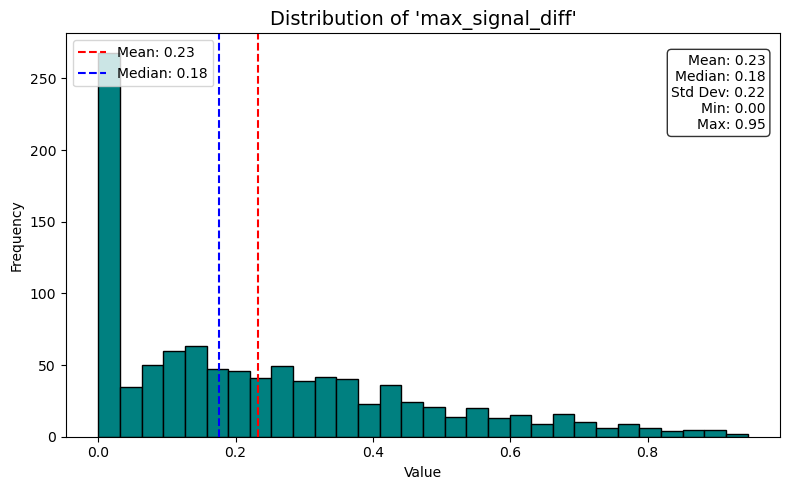

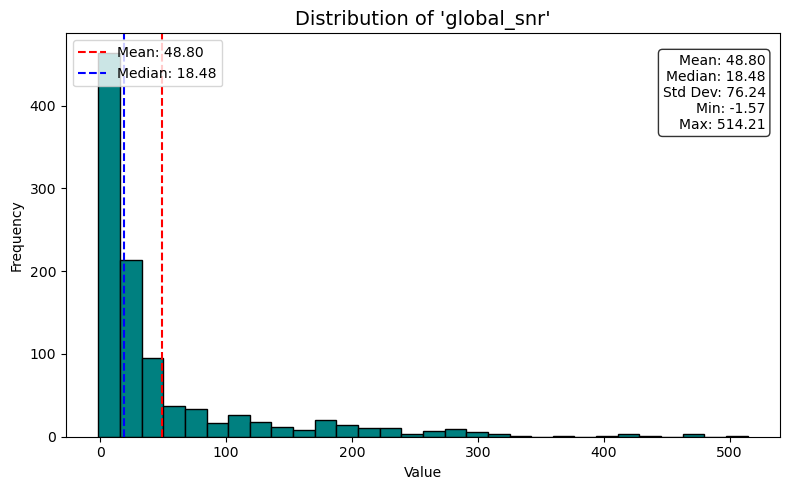

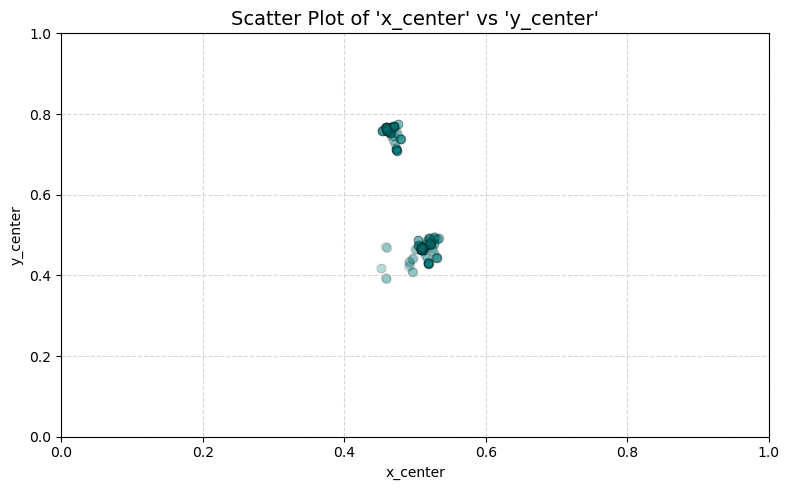

KeyError: 'x1'

In [5]:
# plots_save_path = "/mnt/c/Users/david.chaparro/Documents/Repos/Dataset-Statistics/data/RME03Star/plots/"
plots_save_path = os.path.join(dataset_directory, "plots")
data_statistics = local_files.statistics_file
#Plot all statistics collected in the file
for col_name, col_data in data_statistics.sample_attributes.items():
    column_type = detect_column_type(col_data)
    print(column_type)
    if column_type == "categorical":
        plot_categorical_column(col_data, filepath=plots_save_path, dpi=500)
    elif column_type == "numerical":
        plot_numerical_column(col_data, filepath=plots_save_path, dpi=500)
    elif column_type == "time":
        plot_time_column(col_data, filepath=plots_save_path, dpi=500)
for col_name, col_data in data_statistics.annotation_attributes.items():
    column_type = detect_column_type(col_data)
    if column_type == "categorical":
        plot_categorical_column(col_data, filepath=plots_save_path, dpi=500)
    elif column_type == "numerical":
        plot_numerical_column(col_data, filepath=plots_save_path, dpi=500)


#Plot the x and y locations of the annotations
x_locations=data_statistics.annotation_attributes["x_center"]
y_locations=data_statistics.annotation_attributes["y_center"]
plot_scatter(x_locations, y_locations, alpha=.05, filepath=plots_save_path, dpi=500)

#Plot line segments
plot_lines(data_statistics.annotation_attributes["x1"], data_statistics.annotation_attributes["y1"],
           data_statistics.annotation_attributes["x2"], data_statistics.annotation_attributes["y2"],
           filepath=plots_save_path, dpi=500, alpha=.10)


## Plot Annotations

Plots the annotations, can plot in a zoomed in image of each individual annotation or a whole image of all annotations. Star segments or bounding boxes included

In [ ]:
#Enter the dataset directory you wish to plot annotations for
view_satellite=False
view_star=False
view_image=True


plot_annotations(dataset_directory, view_satellite=False, view_star=False, view_image=True)

Plotting annotations:   0%|          | 0/206 [00:00<?, ?file/s]

Plotting annotations:   2%|▏         | 4/206 [01:12<1:00:59, 18.11s/file]


KeyboardInterrupt: 

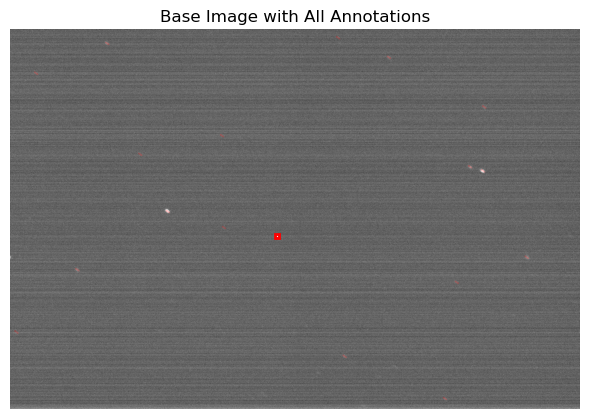

In [5]:
#Pandas dataframes for referenece
#Sample attributes searches parameters relevant to the sample in the dataset
image_attributes = local_files.statistics_file.sample_attributes
#Annotation attributes searches parameters relevant to the annotation in each sample
annotation_attributes = local_files.statistics_file.annotation_attributes

plot_annotation_subset(annotation_attributes[annotation_attributes["local_snr"] < 0], local_files, view_satellite=False,view_star=True, view_image=True)


## Custom paramater search example

Can search and count the number of samples with a certian attribute. __image_attributes__ is for parameters relevant to the sample in each dataset. __annotation_attributes__ is for parameters relevant to each annotation in the dataset. You can use pandas to query the datasets. 

In [ ]:
#Pandas dataframes for referenece
#Sample attributes searches parameters relevant to the sample in the dataset
image_attributes = local_files.statistics_file.sample_attributes
#Annotation attributes searches parameters relevant to the annotation in each sample
annotation_attributes = local_files.statistics_file.annotation_attributes

plt.hist(image_attributes["num_objects"], bins=100)
plt.show()
print(len(image_attributes[image_attributes["num_objects"]==0]))

## Delete Unwanted Files

Can delete files from dataset with a certian attribute. __image_attributes__ is for parameters relevant to the sample in each dataset and you must use. __annotation_attributes__ is for parameters relevant to each annotation in the dataset. You can use pandas to query the datasets. 

In [14]:
#Pandas dataframes for referenece
image_attributes = local_files.statistics_file.sample_attributes
annotation_attributes = local_files.statistics_file.annotation_attributes


#Delete files based on the sample attributes - Inside is a pandas query that you can modify 
# local_files.delete_files_from_annotation(image_attributes[image_attributes["streak_direction_std"] > .025])
with_sats = image_attributes[image_attributes["num_sats"] > 0]
no_stars = with_sats[with_sats["num_stars"] == 0]
local_files.delete_files_from_annotation(no_stars)

#Delete files based on the annotation attributes - Inside is a pandas query that you can modify 
# local_files.delete_files_from_sample(image_attributes[image_attributes['num_objects'] == 0].sample(700))

Deleting files:   0%|          | 0/167 [00:00<?, ?it/s]

Deleting files: 100%|██████████| 167/167 [00:01<00:00, 150.23it/s]


## Recalculate Statistics

In [4]:
local_files.recalculate_statistics()

New database created at /mnt/c/Users/david.chaparro/Documents/Repos/Dataset-Statistics/data/PDS-RME04-2024-07-31/PDS-RME04-2024-07-31_Statistics.pkl


Recalculating Statistics: 100%|██████████| 839/839 [06:02<00:00,  2.31it/s] 
